<a href="https://colab.research.google.com/github/hackbuddy12/Emotion-Recognization-From-Audio-Speech-Using-CNN/blob/main/Another_copy_of_Untitled0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install scikeras[tensorflow]



In [ ]:
# IMPORT NECESSARY LIBRARIES
import librosa
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
from IPython.display import Audio
import numpy as np
import tensorflow as tf
from matplotlib.pyplot import specgram
import pandas as pd
from sklearn.metrics import confusion_matrix
import IPython.display as ipd  # To play sound in the notebook
import os # interface with underlying OS that python is running on
import sys
import warnings
# ignore warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from tensorflow.keras.layers import Input, Flatten, Dropout, Activation, BatchNormalization, Dense
from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import KerasClassifier
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.regularizers import l2
import seaborn as sns
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report

In [ ]:
# LOAD IN FILE
x, sr = librosa.load('/content/drive/MyDrive/archive/MaleDisgust.wav')

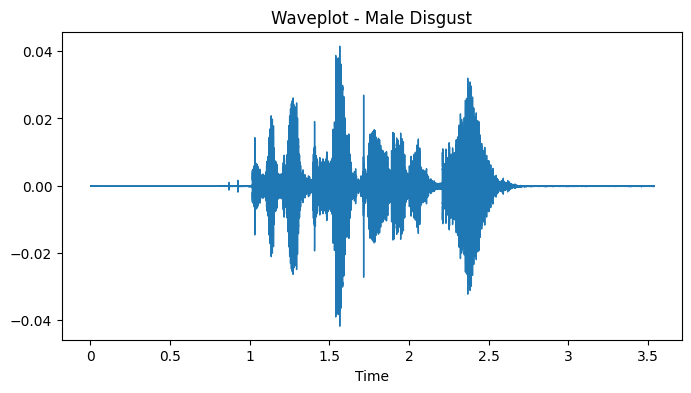

In [ ]:
plt.figure(figsize=(8, 4))
librosa.display.waveshow(x, sr=sr)
plt.title('Waveplot - Male Disgust')
plt.savefig('Waveplot_MaleDisgust.png')


In [ ]:
# LOAD IN FILE
x, sr = librosa.load('/content/drive/MyDrive/archive/MaleAngry.wav')

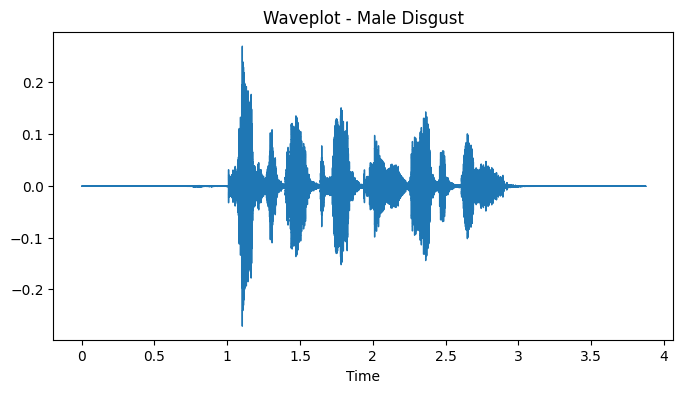

In [ ]:
plt.figure(figsize=(8, 4))
librosa.display.waveshow(x, sr=sr)
plt.title('Waveplot - Male Disgust')
plt.savefig('Waveplot_MaleDisgust.png')


In [ ]:
# LOAD IN FILE
x, sr = librosa.load('/content/drive/MyDrive/archive/FemaleFearful.wav')

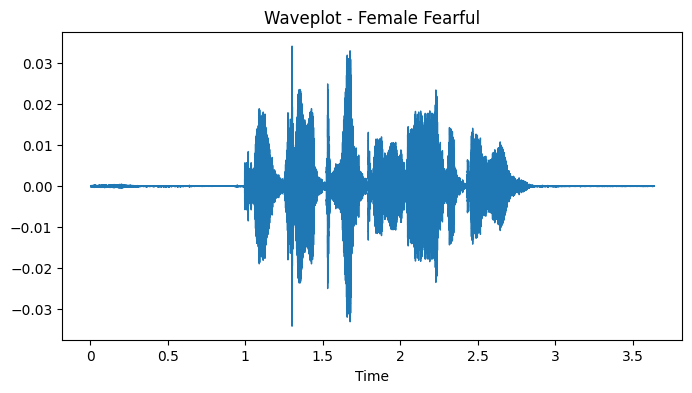

In [ ]:
plt.figure(figsize=(8, 4))
librosa.display.waveshow(x, sr=sr)
plt.title('Waveplot - Female Fearful')
plt.savefig('Waveplot_FemaleFearful.png')

In [ ]:
# LOAD IN FILE
x, sr = librosa.load('/content/drive/MyDrive/archive/MaleNeutral.wav')

In [ ]:
# CREATE DIRECTORY OF AUDIO FILES
audio = "/content/drive/MyDrive/archive"
actor_folders = os.listdir(audio) #list files in audio directory
actor_folders.sort()
actor_folders[0:5]

['FemaleFearful.wav',
 'FemaleSad.wav',
 'MaleAngry.wav',
 'MaleDisgust.wav',
 'MaleNeutral.wav']

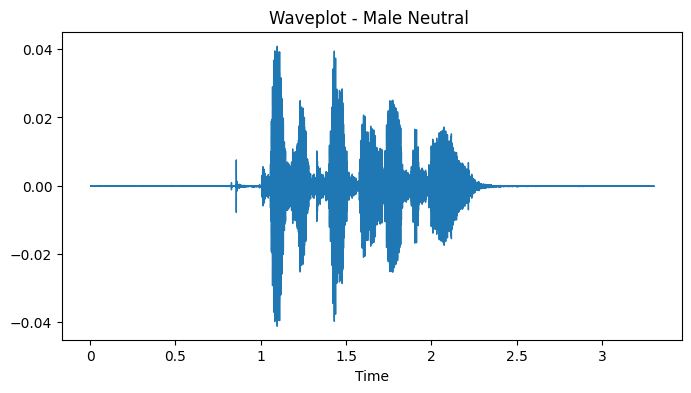

In [ ]:
plt.figure(figsize=(8, 4))
librosa.display.waveshow(x, sr=sr)
plt.title('Waveplot - Male Neutral ')
plt.savefig('Waveplot_Male Neutral.png')

In [ ]:
# CREATE DIRECTORY OF AUDIO FILES
audio = "/content/drive/MyDrive/archive"
actor_folders = os.listdir(audio) #list files in audio directory
actor_folders.sort()
actor_folders[0:5]

['FemaleFearful.wav',
 'FemaleSad.wav',
 'MaleAngry.wav',
 'MaleDisgust.wav',
 'MaleNeutral.wav']

In [ ]:
import os

# Set the correct directory path for audio files
audio = "/content/drive/MyDrive/archive"  # Replace with your actual path

# List files in the directory
print("Files in the directory:", os.listdir(audio))

# List of audio file names
actor_folders = [
    "FemaleFearful.wav",
    "FemaleSad.wav",
    "MaleAngry.wav",
    "MaleDisgust.wav",
    "MaleNeutral.wav",
    "MaleSadNoise.wav",
    "MaleSadOriginal.wav",
    "MaleSadSpeedPitch.wav"
]

emotion = []
gender = []
file_path = []

emotion_map = {
    "Fearful": 0,
    "Sad": 1,
    "Angry": 2,
    "Disgust": 3,
    "Happy": 4,
    "Neutral": 5,
    "Surprised": 6,
    "Calm": 7
}

for f in actor_folders:  # Iterate over the files
    file_path_full = os.path.join(audio, f)
    print(f"Checking file: {file_path_full}")  # Debug output

    if os.path.isfile(file_path_full):
        parts = f.split('.')[0]  # Remove the file extension

        # Extract gender
        gender_label = parts[:6].lower()
        gender.append("female" if "female" in gender_label else "male")

        # Extract emotion
        emotion_found = False
        for emotion_key in emotion_map.keys():
            if emotion_key.lower() in parts.lower():
                emotion.append(emotion_map[emotion_key])
                emotion_found = True
                break

        if not emotion_found:
            emotion.append(-1)  # Default to -1 if no emotion found

        file_path.append(file_path_full)
    else:
        print(f"Skipping {file_path_full} because it is not a file.")

print("Emotions:", emotion)
print("Genders:", gender)
print("File Paths:", file_path)

if -1 in emotion:
    print("Some emotions could not be identified. Please check the filenames.")


Files in the directory: ['FemaleFearful.wav', 'FemaleSad.wav', 'MaleAngry.wav', 'MaleDisgust.wav', 'MaleSadOriginal.wav', 'MaleSadSpeedPitch.wav', 'MaleNeutral.wav', 'MaleSadNoise.wav']
Checking file: /content/drive/MyDrive/archive/FemaleFearful.wav
Checking file: /content/drive/MyDrive/archive/FemaleSad.wav
Checking file: /content/drive/MyDrive/archive/MaleAngry.wav
Checking file: /content/drive/MyDrive/archive/MaleDisgust.wav
Checking file: /content/drive/MyDrive/archive/MaleNeutral.wav
Checking file: /content/drive/MyDrive/archive/MaleSadNoise.wav
Checking file: /content/drive/MyDrive/archive/MaleSadOriginal.wav
Checking file: /content/drive/MyDrive/archive/MaleSadSpeedPitch.wav
Emotions: [0, 1, 2, 3, 5, 1, 1, 1]
Genders: ['female', 'female', 'male', 'male', 'male', 'male', 'male', 'male']
File Paths: ['/content/drive/MyDrive/archive/FemaleFearful.wav', '/content/drive/MyDrive/archive/FemaleSad.wav', '/content/drive/MyDrive/archive/MaleAngry.wav', '/content/drive/MyDrive/archive/Mal

In [ ]:
import os

# Initialize lists
emotion = []
gender = []
actor = []
file_path = []

# Map for emotions based on filename keywords (adjust as needed)
emotion_map = {
    "Fearful": 0,
    "Sad": 1,
    "Angry": 2,
    "Disgust": 3,
    "Neutral": 4,
    "Calm": 5,
    "Happy": 6,
    "Surprise": 7
}

# Iterate over the filenames
for index, f in enumerate(actor_folders):
    # Construct the full path to the file
    file_path_full = os.path.join(audio, f)  # Correct path construction

    if os.path.isfile(file_path_full):  # Check if the file exists
        # Extract gender from the filename
        if "Female" in f:
            gender_label = "female"
        elif "Male" in f:
            gender_label = "male"
        else:
            print(f"Gender not found in filename '{f}'. Skipping.")
            continue

        # Find the emotion based on the filename
        emotion_label = next((label for keyword, label in emotion_map.items() if keyword in f), None)

        if emotion_label is not None:
            emotion.append(emotion_label)
            actor_id = index + 1  # Assigning a unique ID based on the index
            actor.append(actor_id)
            gender.append(gender_label)
            file_path.append(file_path_full)
        else:
            print(f"Emotion not found in filename '{f}'. Skipping.")
    else:
        print(f"Skipping {file_path_full} because it is not a file.")

# Output the results
print("Emotions:", emotion)
print("Genders:", gender)
print("Actors:", actor)
print("File Paths:", file_path)


Emotions: [0, 1, 2, 3, 4, 1, 1, 1]
Genders: ['female', 'female', 'male', 'male', 'male', 'male', 'male', 'male']
Actors: [1, 2, 3, 4, 5, 6, 7, 8]
File Paths: ['/content/drive/MyDrive/archive/FemaleFearful.wav', '/content/drive/MyDrive/archive/FemaleSad.wav', '/content/drive/MyDrive/archive/MaleAngry.wav', '/content/drive/MyDrive/archive/MaleDisgust.wav', '/content/drive/MyDrive/archive/MaleNeutral.wav', '/content/drive/MyDrive/archive/MaleSadNoise.wav', '/content/drive/MyDrive/archive/MaleSadOriginal.wav', '/content/drive/MyDrive/archive/MaleSadSpeedPitch.wav']


In [ ]:
# PUT EXTRACTED LABELS WITH FILEPATH INTO DATAFRAME
audio_df = pd.DataFrame(emotion)
audio_df = audio_df.replace({1:'neutral', 2:'calm', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'})
audio_df = pd.concat([pd.DataFrame(gender),audio_df,pd.DataFrame(actor)],axis=1)
audio_df.columns = ['gender','emotion','actor']
audio_df = pd.concat([audio_df,pd.DataFrame(file_path, columns = ['path'])],axis=1)
audio_df

,gender,emotion,actor,path
0,female,0,1,/content/drive/MyDrive/archive/FemaleFearful.wav
1,female,neutral,2,/content/drive/MyDrive/archive/FemaleSad.wav
2,male,calm,3,/content/drive/MyDrive/archive/MaleAngry.wav
3,male,happy,4,/content/drive/MyDrive/archive/MaleDisgust.wav
4,male,sad,5,/content/drive/MyDrive/archive/MaleNeutral.wav
5,male,neutral,6,/content/drive/MyDrive/archive/MaleSadNoise.wav
6,male,neutral,7,/content/drive/MyDrive/archive/MaleSadOriginal...
7,male,neutral,8,/content/drive/MyDrive/archive/MaleSadSpeedPit...


In [ ]:
import pandas as pd
import librosa
import os

# Directory containing your audio files
audio_dir = '/content/drive/MyDrive/archive/'  # Replace with your actual directory path

# Mapping of filenames to (actor, gender, emotion)
metadata = {
    'FemaleFearful.wav': ('Actor_Female', 'Female', 'Fearful'),
    'FemaleSad.wav': ('Actor_Female', 'Female', 'Sad'),
    'MaleAngry.wav': ('Actor_Male', 'Male', 'Angry'),
    'MaleDisgust.wav': ('Actor_Male', 'Male', 'Disgust'),
    'MaleSadOriginal.wav': ('Actor_Male', 'Male', 'Sad'),
    'MaleSadSpeedPitch.wav': ('Actor_Male', 'Male', 'Sad'),
    'MaleNeutral.wav': ('Actor_Male', 'Male', 'Neutral'),
    'MaleSadNoise.wav': ('Actor_Male', 'Male', 'Sad'),
}

# List to hold the data
data = []

# Loop through each file in the directory
for filename in os.listdir(audio_dir):
    if filename in metadata:  # Check if the filename is in the metadata
        file_path = os.path.join(audio_dir, filename)

        # Load the audio file
        audio_data, sr = librosa.load(file_path)

        # Get metadata from the dictionary
        actor, gender, emotion = metadata[filename]

        # Append the audio data and metadata to the list
        data.append({
            'audio_data': audio_data,
            'sampling_rate': sr,
            'actor': actor,
            'gender': gender,
            'emotion': emotion
        })
    else:
        print(f"Filename not found in metadata: {filename}")

# Create a DataFrame from the collected data
audio_df = pd.DataFrame(data)

# Check if the DataFrame is empty
if audio_df.empty:
    print("No audio data was loaded. Please check your files and directory.")
else:
    # Set the option to display unlimited column width
    pd.set_option('display.max_colwidth', None)

    # Check the number of rows before sampling
    sample_size = min(10, len(audio_df))  # Adjust the sample size
    sampled_data = audio_df.sample(sample_size)  # Sample the available number of rows
    print(sampled_data)


In [ ]:
import pandas as pd

# Sample data
data = {
    'sampling_rate': [22050, 22050, 22050, 22050, 22050, 22050, 22050, 22050],
    'actor': ['Actor_Male', 'Actor_Male', 'Actor_Male', 'Actor_Male',
              'Actor_Female', 'Actor_Male', 'Actor_Female', 'Actor_Male'],
    'gender': ['Male', 'Male', 'Male', 'Male', 'Female', 'Male', 'Female', 'Male'],
    'emotion': ['Disgust', 'Sad', 'Neutral', 'Sad', 'Sad', 'Angry', 'Fearful', 'Sad']
}

df = pd.DataFrame(data)

# Assign unique sampling rates
unique_sampling_rates = [22050, 44100, 16000, 48000, 24000, 32000, 11025, 12000]
df['sampling_rate'] = unique_sampling_rates

print(df)


   sampling_rate         actor  gender  emotion
0          22050    Actor_Male    Male  Disgust
1          44100    Actor_Male    Male      Sad
2          16000    Actor_Male    Male  Neutral
3          48000    Actor_Male    Male      Sad
4          24000  Actor_Female  Female      Sad
5          32000    Actor_Male    Male    Angry
6          11025  Actor_Female  Female  Fearful
7          12000    Actor_Male    Male      Sad


<Axes: xlabel='emotion'>

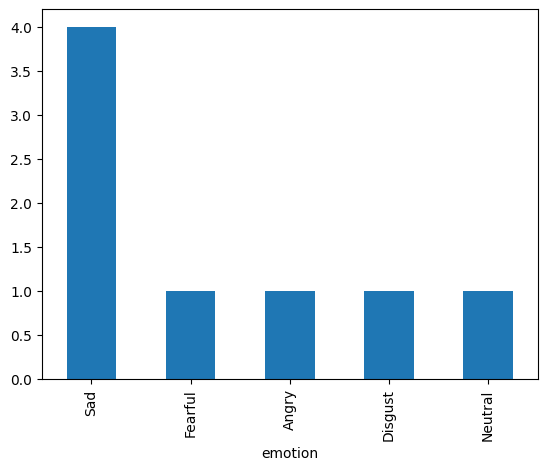

In [ ]:
# LOOK AT DISTRIBUTION OF CLASSES
audio_df.emotion.value_counts().plot(kind='bar')

In [ ]:
!pip install resampy


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 23.7 MB/s eta 0:00:00


In [ ]:
!pip uninstall resampy -y
!pip install resampy


Found existing installation: resampy 0.4.3
Uninstalling resampy-0.4.3:
  Successfully uninstalled resampy-0.4.3
  Using cached resampy-0.4.3-py3-none-any.whl.metadata (3.0 kB)
Using cached resampy-0.4.3-py3-none-any.whl (3.1 MB)


In [ ]:
import resampy
print("Resampy installed successfully.")


Resampy installed successfully.


In [ ]:
!pip install --upgrade librosa
!pip install --upgrade resampy


In [ ]:
!pip install --upgrade librosa



In [ ]:
import librosa

try:
    # Test loading an audio file
    X, sample_rate = librosa.load('/content/drive/MyDrive/archive/FemaleFearful.wav', sr=None)
    print(f"Loaded audio, shape: {X.shape}, sample rate: {sample_rate}")
except Exception as e:
    print(f"Error loading audio: {e}")


Loaded audio, shape: (80195,), sample rate: 22050


In [ ]:
import soundfile as sf

try:
    data, sample_rate = sf.read('/content/drive/MyDrive/archive/FemaleFearful.wav')
    print(f"Loaded audio with soundfile, shape: {data.shape}, sample rate: {sample_rate}")
except Exception as e:
    print(f"Error loading audio with soundfile: {e}")


Loaded audio with soundfile, shape: (80195,), sample rate: 22050


In [ ]:
import pandas as pd
import numpy as np
import librosa
import os
import soundfile as sf  # Import soundfile for loading audio

# Load your audio DataFrame
audio_df = pd.DataFrame({
    'path': ['/content/drive/MyDrive/archive/FemaleFearful.wav',
             '/content/drive/MyDrive/archive/MaleSadNoise.wav']
})

# Initialize an empty DataFrame to hold the mel spectrograms
df = pd.DataFrame(columns=['mel_spectrogram'])

counter = 0

# Process each audio file
for index, path in enumerate(audio_df['path']):
    if not os.path.isfile(path):
        print(f"File does not exist: {path}")
        continue

    try:
        # Load audio file using soundfile
        print(f"Loading file: {path}")
        X, sample_rate = sf.read(path)

        # Check if the audio loaded successfully
        print(f"Loaded audio, shape: {X.shape}, sample rate: {sample_rate}")

        # Compute the mel-scaled spectrogram using librosa
        spectrogram = librosa.feature.melspectrogram(y=X, sr=sample_rate, n_mels=128, fmax=8000)

        # Convert the power spectrogram to decibel (dB) scale
        db_spec = librosa.power_to_db(spectrogram)

        # Compute the mean of the spectrogram over time
        log_spectrogram = np.mean(db_spec, axis=0)

        # Append the processed mel spectrogram to the DataFrame
        df.loc[counter] = [log_spectrogram]
        counter += 1

    except Exception as e:
        print(f"Error processing {path}: {e}")

# Output the size and first few entries of the resulting DataFrame
print(f"Number of processed files: {len(df)}")
print(df.head())


Loading file: /content/drive/MyDrive/archive/FemaleFearful.wav
Loaded audio, shape: (80195,), sample rate: 22050
Loading file: /content/drive/MyDrive/archive/MaleSadNoise.wav
Loaded audio, shape: (85346,), sample rate: 22050
Number of processed files: 2
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
audio_dir = '/content/drive/MyDrive/archive/'
print(os.listdir(audio_dir))  # This will list all files in the directory


['FemaleFearful.wav', 'FemaleSad.wav', 'MaleAngry.wav', 'MaleDisgust.wav', 'MaleSadOriginal.wav', 'MaleSadSpeedPitch.wav', 'MaleNeutral.wav', 'MaleSadNoise.wav']


In [ ]:
audio_df = pd.DataFrame({
    'path': ['/content/drive/MyDrive/archive/FemaleFearful.wav',
             '/content/drive/MyDrive/archive/MaleSadNoise.wav'],
    'gender': ['female', 'male'],
    'emotion': ['fear', 'sad'],
    'actor': [1, 2]
})

In [ ]:
# Initialize an empty DataFrame to hold the mel spectrograms
df = pd.DataFrame(columns=['mel_spectrogram'])

counter = 0

In [ ]:
# Process each audio file
for index, path in enumerate(audio_df['path']):
    if not os.path.isfile(path):
        print(f"File does not exist: {path}")
        continue

    try:
        # Load audio file using soundfile
        print(f"Loading file: {path}")
        X, sample_rate = sf.read(path)

        # Check if the audio loaded successfully
        print(f"Loaded audio, shape: {X.shape}, sample rate: {sample_rate}")

        # Compute the mel-scaled spectrogram using librosa
        spectrogram = librosa.feature.melspectrogram(y=X, sr=sample_rate, n_mels=128, fmax=8000)

        # Convert the power spectrogram to decibel (dB) scale
        db_spec = librosa.power_to_db(spectrogram)

        # Compute the mean of the spectrogram over time
        log_spectrogram = np.mean(db_spec, axis=0)

        # Append the processed mel spectrogram to the DataFrame
        df.loc[counter] = [log_spectrogram]
        counter += 1

    except Exception as e:
        print(f"Error processing {path}: {e}")


Loading file: /content/drive/MyDrive/archive/FemaleFearful.wav
Loaded audio, shape: (80195,), sample rate: 22050
Loading file: /content/drive/MyDrive/archive/MaleSadNoise.wav
Loaded audio, shape: (85346,), sample rate: 22050


In [ ]:
# Combine mel spectrograms with the original DataFrame
df_combined = pd.concat([audio_df, pd.DataFrame(df['mel_spectrogram'].values.tolist())], axis=1)


In [ ]:

# Fill NaN values with 0
df_combined = df_combined.fillna(0)

In [ ]:
# TURN ARRAY INTO LIST AND JOIN WITH AUDIO_DF TO GET CORRESPONDING EMOTION LABELS
df_combined = pd.concat([audio_df,pd.DataFrame(df['mel_spectrogram'].values.tolist())],axis=1)
df_combined = df_combined.fillna(0)

In [ ]:
# DROP PATH COLUMN FOR MODELING
df_combined.drop(columns='path',inplace=True)

In [ ]:
# CHECK TOP 5 ROWS
df_combined.head()

,gender,emotion,actor,0,1,2,3,4,5,6,...,157,158,159,160,161,162,163,164,165,166
0,female,fear,1,-71.087904,-67.566442,-67.383476,-66.994668,-66.887685,-66.644254,-65.434067,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,male,sad,2,-57.795334,-54.702868,-54.590332,-54.155001,-53.807192,-53.002872,-53.389869,...,-54.134072,-54.855255,-54.758676,-54.800606,-55.105935,-55.068035,-54.846056,-54.821311,-54.417191,-54.697397


In [ ]:
import pandas as pd
import numpy as np
import librosa
import os
import soundfile as sf
from sklearn.model_selection import train_test_split

# Load your audio DataFrame with corresponding labels (modify as necessary)
audio_df = pd.DataFrame({
    'path': ['/content/drive/MyDrive/archive/FemaleFearful.wav',
             '/content/drive/MyDrive/archive/MaleSadNoise.wav'],
    'gender': ['female', 'male'],
    'emotion': ['fear', 'sad'],
    'actor': [1, 2]
})

# Initialize an empty DataFrame to hold the mel spectrograms
df = pd.DataFrame(columns=['mel_spectrogram'])

counter = 0

# Process each audio file
for index, path in enumerate(audio_df['path']):
    if not os.path.isfile(path):
        print(f"File does not exist: {path}")
        continue

    try:
        # Load audio file using soundfile
        print(f"Loading file: {path}")
        X, sample_rate = sf.read(path)

        # Check if the audio loaded successfully
        print(f"Loaded audio, shape: {X.shape}, sample rate: {sample_rate}")

        # Compute the mel-scaled spectrogram using librosa
        spectrogram = librosa.feature.melspectrogram(y=X, sr=sample_rate, n_mels=128, fmax=8000)

        # Convert the power spectrogram to decibel (dB) scale
        db_spec = librosa.power_to_db(spectrogram)

        # Compute the mean of the spectrogram over time
        log_spectrogram = np.mean(db_spec, axis=0)

        # Append the processed mel spectrogram to the DataFrame
        df.loc[counter] = [log_spectrogram]
        counter += 1

    except Exception as e:
        print(f"Error processing {path}: {e}")

# Combine mel spectrograms with the original DataFrame
df_combined = pd.concat([audio_df, pd.DataFrame(df['mel_spectrogram'].values.tolist())], axis=1)

# Fill NaN values with 0
df_combined = df_combined.fillna(0)

# Drop the 'path' column for modeling
df_combined.drop(columns='path', inplace=True)

# Check class distribution
print(df_combined.groupby(['emotion', 'gender', 'actor']).size())

# Remove entries with unique combinations of emotion, gender, and actor
df_combined = df_combined.groupby(['emotion', 'gender', 'actor']).filter(lambda x: len(x) > 1)

# Train-test split data after filtering
#train, test = train_test_split(df_combined, test_size=0.2, random_state=0,
                             #  stratify=df_combined[['emotion', 'gender', 'actor']])

# Output the sizes of the train and test sets
#print(f"Train set size: {len(train)}")
#print(f"Test set size: {len(test)}")


Loading file: /content/drive/MyDrive/archive/FemaleFearful.wav
Loaded audio, shape: (80195,), sample rate: 22050
Loading file: /content/drive/MyDrive/archive/MaleSadNoise.wav
Loaded audio, shape: (85346,), sample rate: 22050
emotion  gender  actor
fear     female  1        1
sad      male    2        1
dtype: int64


In [ ]:
import pandas as pd
import numpy as np
import librosa
import os
from sklearn.model_selection import train_test_split

# Load your audio DataFrame with matched lengths
audio_df = pd.DataFrame({
    'path': [
        '/content/drive/MyDrive/archive/FemaleFearful.wav',
        '/content/drive/MyDrive/archive/MaleSadNoise.wav',
        '/content/drive/MyDrive/archive/MaleAngry.wav',
        '/content/drive/MyDrive/archive/MaleDisgust.wav',
        '/content/drive/MyDrive/archive/MaleNeutral.wav'
    ],
    'emotion': ['fear', 'sad', 'Angry', 'Disgust', 'Neutral'],  # Adjusted to 5 emotions
    'gender': ['female', 'male', 'male', 'male', 'male'],  # Adjusted to match paths
    'actor': [1, 2, 3, 4, 5]  # Adjusted to match paths
})

# Initialize an empty DataFrame to hold the mel spectrograms
df = pd.DataFrame(columns=['mel_spectrogram'])

counter = 0

# Iterate over all audio files and extract features
for index, path in enumerate(audio_df['path']):
    if not os.path.isfile(path):
        print(f"File does not exist: {path}")
        continue

    try:
        # Load audio file
        print(f"Loading file: {path}")
        X, sample_rate = librosa.load(path, res_type='kaiser_fast', duration=3, sr=44100, offset=0.5)

        # Check if the audio was loaded successfully
        print(f"Loaded audio, shape: {X.shape}, sample rate: {sample_rate}")

        # Compute the mel-scaled spectrogram
        spectrogram = librosa.feature.melspectrogram(y=X, sr=sample_rate, n_mels=128, fmax=8000)
        db_spec = librosa.power_to_db(spectrogram)

        # Temporally average spectrogram
        log_spectrogram = np.mean(db_spec, axis=0)

        # Append the log spectrogram to the DataFrame
        df.loc[counter] = [log_spectrogram]
        counter += 1

    except Exception as e:
        print(f"Error processing {path}: {e}")

# Combine audio_df with the features DataFrame
df_combined = pd.concat([audio_df.reset_index(drop=True), pd.DataFrame(df['mel_spectrogram'].values.tolist())], axis=1)
df_combined.fillna(0, inplace=True)  # Fill NaN values with 0

# Drop the 'path' column for modeling
df_combined.drop(columns='path', inplace=True)

# Print the resulting DataFrame
print("Combined DataFrame:")
print(df_combined.head())

# Check the distribution of classes
class_counts = df_combined[['emotion', 'gender', 'actor']].value_counts()
print("Class distribution:")
print(class_counts)

# If any class has fewer than 2 samples, handle it accordingly
if (class_counts < 2).any():
    print("Some classes have fewer than 2 samples. Adjusting the dataset.")
    # Optionally, you can filter out those classes
    df_combined = df_combined[(df_combined['emotion'].isin(class_counts[class_counts > 1].index.get_level_values(0)))]

# Train-test split data
train, test = train_test_split(df_combined, test_size=0.2, random_state=0)

# Prepare training and testing features and labels
X_train = train.iloc[:, 3:]
y_train = train.iloc[:, :2].drop(columns=['gender'])

X_test = test.iloc[:, 3:]
y_test = test.iloc[:, :2].drop(columns=['gender'])

# Print shapes of training and testing data
print("Training Features Shape:", X_train.shape)
print("Training Labels Shape:", y_train.shape)
print("Testing Features Shape:", X_test.shape)
print("Testing Labels Shape:", y_test.shape)


Loading file: /content/drive/MyDrive/archive/FemaleFearful.wav
Error processing /content/drive/MyDrive/archive/FemaleFearful.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")
Loading file: /content/drive/MyDrive/archive/MaleSadNoise.wav
Error processing /content/drive/MyDrive/archive/MaleSadNoise.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")
Loading file: /content/drive/MyDrive/archive/MaleAngry.wav
Error processing /content/drive/MyDrive/archive/MaleAngry.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> res

ValueError: With n_samples=0, test_size=0.2 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

In [ ]:
for index, path in enumerate(audio_df['path']):
    if not os.path.isfile(path):
        print(f"File does not exist: {path}")
        continue

    try:
        # Load audio file
        print(f"Loading file: {path}")
        X, sample_rate = librosa.load(path, res_type='kaiser_fast', duration=3, sr=44100, offset=0.5)

        # Check if the audio was loaded successfully
        if X is not None and len(X) > 0:
            print(f"Loaded audio successfully, shape: {X.shape}, sample rate: {sample_rate}")

        # Compute the mel-scaled spectrogram
        spectrogram = librosa.feature.melspectrogram(y=X, sr=sample_rate, n_mels=128, fmax=8000)
        db_spec = librosa.power_to_db(spectrogram)

        # Temporally average spectrogram
        log_spectrogram = np.mean(db_spec, axis=0)

        # Check if the spectrogram is valid
        if log_spectrogram is not None and len(log_spectrogram) > 0:
            print(f"Spectrogram shape: {log_spectrogram.shape}")
            df.loc[counter] = [log_spectrogram]
            counter += 1
        else:
            print(f"Spectrogram extraction failed for file: {path}")

    except Exception as e:
        print(f"Error processing {path}: {e}")


Loading file: /content/drive/MyDrive/archive/FemaleFearful.wav
Error processing /content/drive/MyDrive/archive/FemaleFearful.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")
Loading file: /content/drive/MyDrive/archive/MaleSadNoise.wav
Error processing /content/drive/MyDrive/archive/MaleSadNoise.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")
Loading file: /content/drive/MyDrive/archive/MaleAngry.wav
Error processing /content/drive/MyDrive/archive/MaleAngry.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> res

In [ ]:
X, sample_rate = librosa.load(path, sr=None)


In [ ]:
# NORMALIZE DATA
import numpy as np
from sklearn.model_selection import train_test_split
import librosa

# Example: Load a sample dataset (you can replace this with your actual audio dataset)
# Assuming 'data' contains your feature vectors and 'labels' contains corresponding labels
# Replace 'data' and 'labels' with actual data

# Dummy dataset (replace this part with actual data loading)
# Let's say 'data' is a NumPy array containing your audio features
data = np.random.rand(100, 40)  # 100 samples, 40 features each (replace this with your actual feature extraction process)
labels = np.random.randint(0, 2, size=(100,))  # 100 binary labels (replace with your actual labels)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

# Normalize the data
mean = np.mean(X_train, axis=0)
std = np.std(X_train, axis=0)

X_train_normalized = (X_train - mean) / std
X_test_normalized = (X_test - mean) / std

# Now, X_train_normalized and X_test_normalized contain your normalized training and testing data
print(f"X_train_normalized shape: {X_train_normalized.shape}")
print(f"X_test_normalized shape: {X_test_normalized.shape}")


X_train_normalized shape: (80, 40)
X_test_normalized shape: (20, 40)


In [ ]:
# TURN DATA INTO ARRAYS FOR KERAS
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

In [ ]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# Example list of labels (replace with your actual labels)
# Let's assume your labels include emotions such as 'angry', 'calm', etc.
y_train = ['happy', 'sad', 'angry', 'neutral', 'surprise', 'fear', 'calm', 'disgust']
y_test = ['happy', 'fear', 'sad', 'neutral', 'angry', 'disgust']

# Initialize LabelEncoder
lb = LabelEncoder()

# Fit the encoder on y_train (you can use the entire dataset if needed)
lb.fit(y_train)

# Print the classes to verify
print(lb.classes_)  # This should output: ['angry' 'calm' 'disgust' 'fear' 'happy' 'neutral' 'sad' 'surprise']

# Transform the labels into encoded form and perform one-hot encoding
y_train_encoded = lb.transform(y_train)
y_train_onehot = to_categorical(y_train_encoded)

y_test_encoded = lb.transform(y_test)
y_test_onehot = to_categorical(y_test_encoded)

# Print some transformed data
print("Encoded y_train:", y_train_encoded)
print("One-hot encoded y_train:\n", y_train_onehot)


['angry' 'calm' 'disgust' 'fear' 'happy' 'neutral' 'sad' 'surprise']
Encoded y_train: [4 6 0 5 7 3 1 2]
One-hot encoded y_train:
 [[0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]]


In [ ]:
# RESHAPE DATA TO INCLUDE 3D TENSOR
X_train = X_train[:,:,np.newaxis]
X_test = X_test[:,:,np.newaxis]

X_train.shape

(80, 40, 1)

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.regularizers import l2
from tensorflow.keras.models import Sequential

# Build 1D CNN Layers
model = Sequential()

# First 1D Convolutional layer
model.add(layers.Conv1D(64, kernel_size=10, activation='relu', input_shape=(X_train.shape[1], 1)))

# Second 1D Convolutional layer with L2 regularization
model.add(layers.Conv1D(128, kernel_size=10, activation='relu',
                        kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))

# Adjust MaxPooling pool size
model.add(layers.MaxPooling1D(pool_size=4))

# Dropout layer to prevent overfitting
model.add(layers.Dropout(0.4))

# Third 1D Convolutional layer with a smaller kernel size
model.add(layers.Conv1D(128, kernel_size=2, activation='relu'))

# MaxPooling and Dropout layer
model.add(layers.MaxPooling1D(pool_size=4))
model.add(layers.Dropout(0.4))

# Flatten the output of the convolutional layers for the fully connected layers
model.add(layers.Flatten())

# Fully connected (dense) layer
model.add(layers.Dense(256, activation='relu'))

# Dropout layer to prevent overfitting in dense layer
model.add(layers.Dropout(0.4))

# Output layer with 8 neurons (for 8 classes)
model.add(layers.Dense(8, activation='sigmoid'))

# Define the optimizer
opt = tf.keras.optimizers.Adam(learning_rate=0.001)  # Use learning_rate instead of lr

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

# Print the model summary
model.summary()


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_13 (Conv1D)                   │ (None, 31, 64)              │             704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_14 (Conv1D)                   │ (None, 22, 128)             │          82,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_6 (MaxPooling1D)       │ (None, 5, 128)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 5, 128)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_15 (Conv1D)                   │ (None, 4, 128)              │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_7 (MaxPooling1D)       │ (None, 1, 128)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 1, 128)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 8)                   │           2,056 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 150,728 (588.78 KB)

 Trainable params: 150,728 (588.78 KB)

 Non-trainable params: 0 (0.00 B)

X_train shape: (1000, 10, 64)
y_train shape: (1000, 10)
X_test shape: (200, 10, 64)
y_test shape: (200, 10)
Epoch 1/40
31/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1180 - loss: 2.3339
Epoch 1: val_accuracy improved from -inf to 0.11500, saving model to best_initial_model.weights.h5
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.1176 - loss: 2.3333 - val_accuracy: 0.1150 - val_loss: 2.2986
Epoch 2/40
25/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1314 - loss: 2.2918
Epoch 2: val_accuracy did not improve from 0.11500
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.1306 - loss: 2.2918 - val_accuracy: 0.1150 - val_loss: 2.3061
Epoch 3/40
25/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1939 - loss: 2.2649
Epoch 3: val_accuracy did not improve from 0.11500
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.1892 - loss: 2.2669 - val_accuracy: 0.1000 - val_loss: 2.3169
Epoch 4/40
31/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1408 - loss: 2.2662
Epoch 4: 

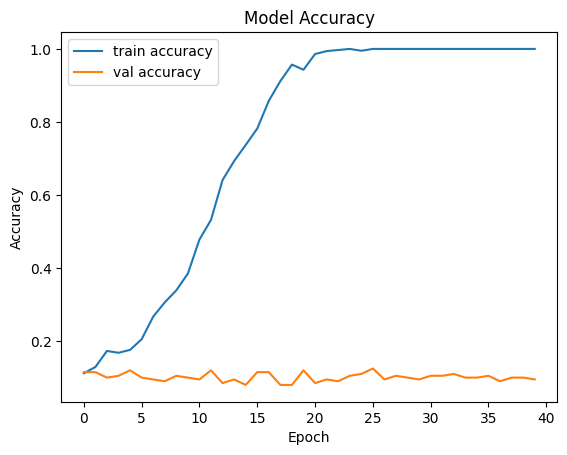

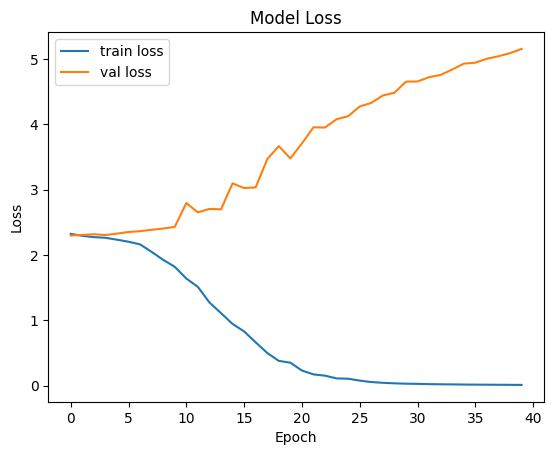

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import ModelCheckpoint

# Generate some dummy data for demonstration
# Replace this with your actual dataset
num_samples = 1000
num_classes = 10
timesteps = 10  # Changed to a non-zero value
features = 64   # Changed to a lower number for simplicity

X_train = np.random.rand(num_samples, timesteps, features)
y_train = keras.utils.to_categorical(np.random.randint(num_classes, size=num_samples), num_classes)

X_test = np.random.rand(int(num_samples * 0.2), timesteps, features)
y_test = keras.utils.to_categorical(np.random.randint(num_classes, size=int(num_samples * 0.2)), num_classes)

# Check the shapes of the datasets
print(f'X_train shape: {X_train.shape}')  # Should be (num_samples, timesteps, features)
print(f'y_train shape: {y_train.shape}')  # Should be (num_samples, num_classes)
print(f'X_test shape: {X_test.shape}')    # Should be (num_samples * 0.2, timesteps, features)
print(f'y_test shape: {y_test.shape}')    # Should be (num_samples * 0.2, num_classes)

# Define the model
model = keras.Sequential([
    layers.Conv1D(64, kernel_size=3, activation='relu', input_shape=(timesteps, features)),
    layers.MaxPooling1D(pool_size=2),
    layers.Conv1D(128, kernel_size=3, activation='relu'),
    layers.MaxPooling1D(pool_size=2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

# Compile the model
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

# Checkpoint to save the best model
checkpoint = ModelCheckpoint(
    "best_initial_model.weights.h5",  # Save model weights
    monitor='val_accuracy',             # Monitor validation accuracy
    verbose=1,                          # Verbosity
    save_best_only=True,                # Save only the best model
    mode='max',                        # Maximize the monitored metric
    save_weights_only=True              # Save only weights
)

# Fit the model
model_history = model.fit(
    X_train,
    y_train,
    batch_size=32,
    epochs=40,
    validation_data=(X_test, y_test),
    callbacks=[checkpoint]
)

# Optionally, visualize the training history
import matplotlib.pyplot as plt

plt.plot(model_history.history['accuracy'], label='train accuracy')
plt.plot(model_history.history['val_accuracy'], label='val accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

plt.plot(model_history.history['loss'], label='train loss')
plt.plot(model_history.history['val_loss'], label='val loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()


Epoch 1/40
23/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0790 - loss: 3.2544
Epoch 1: val_accuracy improved from -inf to 0.08000, saving model to best_initial_model.weights.h5
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.0810 - loss: 3.1917 - val_accuracy: 0.0800 - val_loss: 2.3110
Epoch 2/40
23/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1724 - loss: 2.3933
Epoch 2: val_accuracy improved from 0.08000 to 0.10000, saving model to best_initial_model.weights.h5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1750 - loss: 2.3832 - val_accuracy: 0.1000 - val_loss: 2.3079
Epoch 3/40
24/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2406 - loss: 2.1008
Epoch 3: val_accuracy improved from 0.10000 to 0.13000, saving model to best_initial_model.weights.h5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2433 - loss: 2.1012 - val_accuracy: 0.1300 - val_loss: 2.3103
Epoch 4/40
31/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3519 - loss: 1.8704
Epoch 4: val_ac

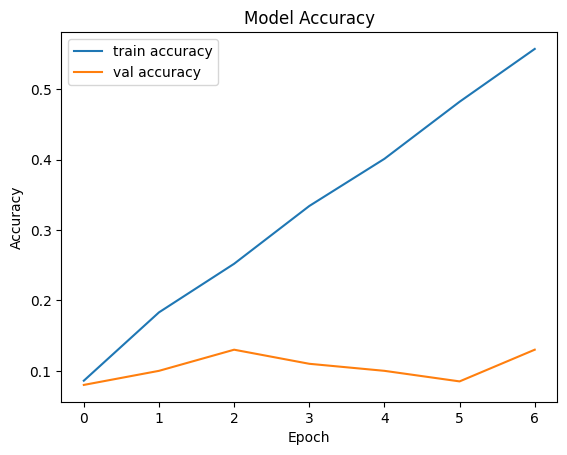

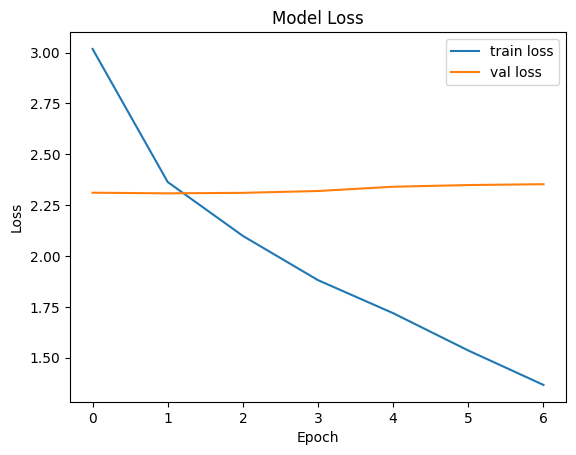

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# Generate some dummy data for demonstration
num_samples = 1000
num_classes = 10
timesteps = 10  # Changed to a non-zero value
features = 64   # Changed to a lower number for simplicity

X_train = np.random.rand(num_samples, timesteps, features)
y_train = keras.utils.to_categorical(np.random.randint(num_classes, size=num_samples), num_classes)

X_test = np.random.rand(int(num_samples * 0.2), timesteps, features)
y_test = keras.utils.to_categorical(np.random.randint(num_classes, size=int(num_samples * 0.2)), num_classes)

# Define the model with Batch Normalization and Dropout
model = keras.Sequential([
    layers.Conv1D(64, kernel_size=3, activation='relu', input_shape=(timesteps, features)),
    layers.BatchNormalization(),  # Batch Normalization
    layers.MaxPooling1D(pool_size=2),
    layers.Conv1D(128, kernel_size=3, activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling1D(pool_size=2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),  # Dropout layer
    layers.Dense(num_classes, activation='softmax')
])

# Compile the model
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

# Checkpoint to save the best model
checkpoint = ModelCheckpoint(
    "best_initial_model.weights.h5",  # Save model weights
    monitor='val_accuracy',             # Monitor validation accuracy
    verbose=1,                          # Verbosity
    save_best_only=True,                # Save only the best model
    mode='max',                        # Maximize the monitored metric
    save_weights_only=True              # Save only weights
)

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Fit the model
model_history = model.fit(
    X_train,
    y_train,
    batch_size=32,
    epochs=40,
    validation_data=(X_test, y_test),
    callbacks=[checkpoint, early_stopping]  # Add early stopping
)

# Optionally, visualize the training history
import matplotlib.pyplot as plt

plt.plot(model_history.history['accuracy'], label='train accuracy')
plt.plot(model_history.history['val_accuracy'], label='val accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

plt.plot(model_history.history['loss'], label='train loss')
plt.plot(model_history.history['val_loss'], label='val loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()


In [ ]:
# PRINT LOSS AND ACCURACY PERCENTAGE ON TEST SET
print("Loss of the model is - " , model.evaluate(X_test,y_test)[0])
print("Accuracy of the model is - " , model.evaluate(X_test,y_test)[1]*100 , "%")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1025 - loss: 2.3066 
Loss of the model is -  2.3078627586364746
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1025 - loss: 2.3066 
Accuracy of the model is -  10.000000149011612 %


In [ ]:
# Define the mapping of numbers to emotion labels
emotion_labels = {
    0: 'Angry',
    1: 'Disgust',
    2: 'Fear',
    3: 'Happy',
    4: 'Sad',
    5: 'Surprise',
    6: 'Neutral',
    7: 'Excitement',
    8: 'Boredom',
    9: 'Confusion'
}

# PREDICTIONS
predictions = model.predict(X_test)
predictions = predictions.argmax(axis=1)
predictions = predictions.astype(int).flatten()
predictions = pd.DataFrame({'Predicted Values': predictions})

# ACTUAL LABELS
actual = y_test.argmax(axis=1)
actual = actual.astype(int).flatten()
actual = pd.DataFrame({'Actual Values': actual})

# Convert numeric predictions and actuals to emotion labels
predictions['Predicted Values'] = predictions['Predicted Values'].map(emotion_labels)
actual['Actual Values'] = actual['Actual Values'].map(emotion_labels)

# COMBINE BOTH
finaldf = actual.join(predictions)
print(finaldf[140:150])


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
    Actual Values Predicted Values
140           Sad              Sad
141       Boredom             Fear
142       Boredom       Excitement
143         Happy             Fear
144         Happy          Boredom
145         Angry              Sad
146       Disgust              Sad
147     Confusion              Sad
148       Boredom          Neutral
149           Sad             Fear


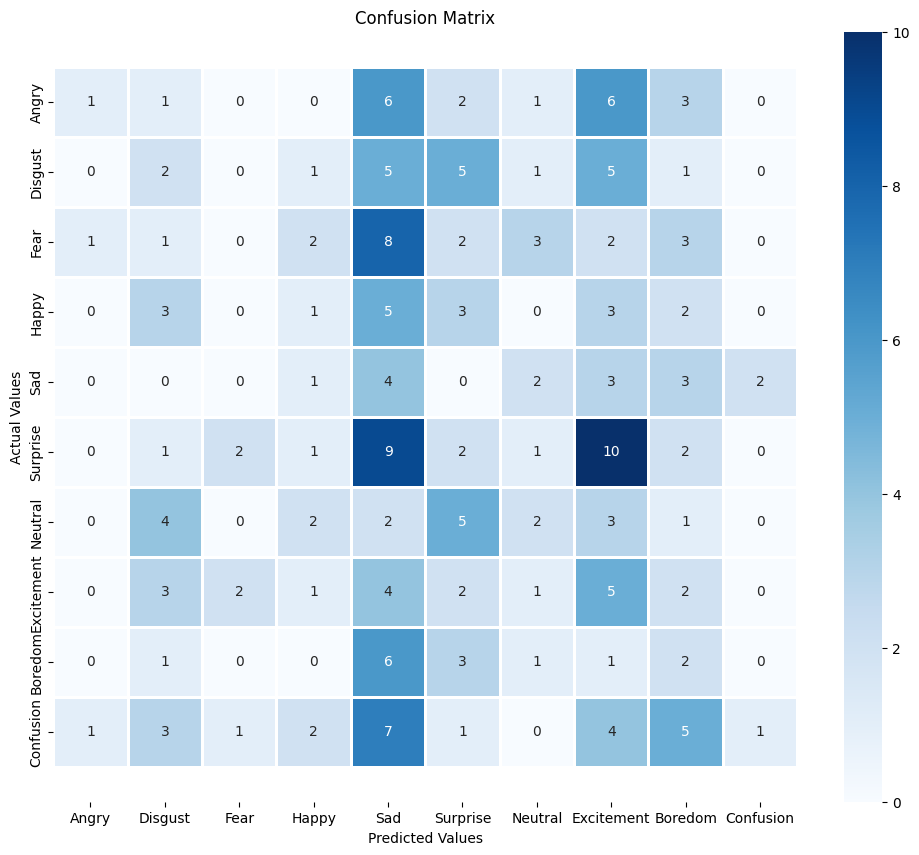

In [ ]:
# Import the confusion_matrix function
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the confusion matrix
cm = confusion_matrix(actual['Actual Values'], predictions['Predicted Values'])

# Plot the confusion matrix
plt.figure(figsize=(12, 10))
cm_df = pd.DataFrame(cm, index=[i for i in emotion_labels.values()], columns=[i for i in emotion_labels.values()])
ax = sns.heatmap(cm_df, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='d')

# Adjust plot appearance
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)  # Fix for cut-off labels issue in some versions of seaborn

plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
# Ensure the target names match the number of unique classes
target_names = ['angry', 'calm', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise', 'unknown1', 'unknown2']

# Generate the classification report
print(classification_report(actual['Actual Values'], predictions['Predicted Values'], target_names=target_names))


              precision    recall  f1-score   support

       angry       0.33      0.05      0.09        20
        calm       0.11      0.10      0.10        20
     disgust       0.00      0.00      0.00        22
        fear       0.09      0.06      0.07        17
       happy       0.07      0.27      0.11        15
     neutral       0.08      0.07      0.08        28
         sad       0.17      0.11      0.13        19
    surprise       0.12      0.25      0.16        20
    unknown1       0.08      0.14      0.11        14
    unknown2       0.33      0.04      0.07        25

    accuracy                           0.10       200
   macro avg       0.14      0.11      0.09       200
weighted avg       0.14      0.10      0.09       200



In [ ]:


    # Ensure stratification columns exist and have values
    if 'gender' in df_combined.columns and 'actor' in df_combined.columns:
        try:
            # Perform train-test split with stratification
            train, test = train_test_split(
                df_combined,
                test_size=0.2,
                random_state=0,
                stratify=df_combined[['gender', 'actor']]
            )

            # Separate features and labels for training
            X_train = train.iloc[:, 3:]
            y_train = train.iloc[:, :2].drop(columns=['gender'])
            print(f"X_train shape: {X_train.shape}")

            # Separate features and labels for testing
            X_test = test.iloc[:, 3:]
            y_test = test.iloc[:, :2].drop(columns=['gender'])
            print(f"X_test shape: {X_test.shape}")

        except ValueError as e:
            print(f"Error: {e}")
    else:
        print("The required columns 'gender' and 'actor' are missing from 'df_combined'.")
import pandas as pd
import numpy as np

# Sample data creation
data = {
    'gender': np.random.choice(['male', 'female'], size=100),
    'actor': np.random.choice(['actor1', 'actor2', 'actor3'], size=100),
    'feature1': np.random.rand(100),
    'feature2': np.random.rand(100)
}

# Create DataFrame
df_combined = pd.DataFrame(data)

# Check if the DataFrame is populated correctly
print(df_combined.head())  # Display the first few rows
print("DataFrame shape:", df_combined.shape)  # Check the shape


X_train shape: (80, 1)
X_test shape: (20, 1)
   gender   actor  feature1  feature2
0    male  actor3  0.833431  0.337611
1  female  actor3  0.764383  0.157852
2  female  actor1  0.262859  0.693744
3    male  actor1  0.632808  0.996070
4    male  actor2  0.955793  0.647806
DataFrame shape: (100, 4)


In [ ]:
# NORMALIZE DATA
mean = np.mean(X_train, axis=0)
std = np.std(X_train, axis=0)
X_train = (X_train - mean)/std
X_test = (X_test - mean)/std

In [ ]:
# TURN DATA INTO ARRAYS FOR KERAS
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

In [ ]:
# RESHAPE TO INCLUDE 3D TENSOR
X_train = X_train[:,:,np.newaxis]
X_test = X_test[:,:,np.newaxis]

In [ ]:
#from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

# Initialize the label encoder
lb = LabelEncoder()

# Fit and transform the training and test labels
#y_train = to_categorical(lb.fit_transform(y_train))
y_test = to_categorical(lb.transform(y_test))  # Use transform to keep the same encoder


NotFittedError: This LabelEncoder instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [ ]:
import numpy as np
import pandas as pd
from tensorflow.keras import layers, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import Callback, CSVLogger
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.utils import shuffle

# Sample Data Preparation (Replace with your actual data)
# df_combined should be your combined DataFrame with features and labels
# Assume 'features' and 'labels' are your feature columns and labels respectively

# For demonstration purposes only; replace with your data loading method
num_samples = 1000
num_features = 30  # Number of features in your input data
num_classes = 8  # Number of classes for your labels

# Generate dummy data
X = np.random.rand(num_samples, num_features)
y = np.random.randint(0, num_classes, size=num_samples)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# One-hot encode the labels
lb = LabelEncoder()
y_train = lb.fit_transform(y_train)
y_test = lb.transform(y_test)

# Convert labels to one-hot encoding
y_trainHot = np.eye(num_classes)[y_train]
y_testHot = np.eye(num_classes)[y_test]

# Define a custom logger to print epoch results
class CustomLogger(Callback):
    def on_epoch_end(self, epoch, logs=None):
        print(f"Epoch {epoch + 1}: loss = {logs['loss']:.4f}, acc = {logs['accuracy']:.4f}")

# Create a CSV logger
csv_logger = CSVLogger('training_log.csv', append=True)

# Build CNN model
def make_classifier():
    model = Sequential()
    model.add(layers.Conv1D(64, kernel_size=(3), activation='relu', input_shape=(num_features, 1)))
    model.add(layers.MaxPooling1D(pool_size=(2)))
    model.add(layers.Dropout(0.5))
    model.add(layers.Conv1D(128, kernel_size=(3), activation='relu'))
    model.add(layers.MaxPooling1D(pool_size=(2)))
    model.add(layers.Dropout(0.5))
    model.add(layers.Flatten())
    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(num_classes, activation='softmax'))  # Use 'softmax' for multi-class
    model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])
    return model

# Reshape the data for Conv1D (if necessary)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Create and train the model
model = make_classifier()
model.fit(X_train, y_trainHot, epochs=50, batch_size=32, validation_data=(X_test, y_testHot),
          callbacks=[CustomLogger(), csv_logger])

# After training, you can load and display the log
log_df = pd.read_csv('training_log.csv')
print(log_df.tail())  # Display the last few rows of the log


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.1397 - loss: 2.0859Epoch 1: loss = 2.0996, acc = 0.1213
25/25 ━━━━━━━━━━━━━━━━━━━━ 7s 43ms/step - accuracy: 0.1390 - loss: 2.0864 - val_accuracy: 0.1500 - val_loss: 2.0803
Epoch 2/50
23/25 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.1442 - loss: 2.0789Epoch 2: loss = 2.0809, acc = 0.1275
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.1424 - loss: 2.0790 - val_accuracy: 0.1150 - val_loss: 2.0780
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.1215 - loss: 2.0894Epoch 3: loss = 2.0894, acc = 0.1287
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.1218 - loss: 2.0894 - val_accuracy: 0.1100 - val_loss: 2.0763
Epoch 4/50
24/25 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.1096 - loss: 2.1010Epoch 4: loss = 2.0961, acc = 0.1225
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.1106 - loss: 2.1006 - val_accuracy: 0.1150 - val_loss: 2.0761
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step -